# Численное дифференцирование

## Вариант 20

> <span style="font-style:normal; font-size:12pt;"> 
    <p> Используя правую и цетральные разности численно вычислить первую производную функции f(x) на отрезке [a, b] в узлах сетки. Используя цетральные разности, вычислить вторую производную функции f(x) со вторым и четвертым порядком точности в узлах сетки. </p>

$$
\begin{equation}
f(x) = \frac{x}{1 + tan^2(x)}, \ \ \ {x \in [-1.5, 1.5]}
\end{equation}
$$

<!-- ![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png) -->

<!-- На интервале точки с заданным шагом h. Правая разность и центральная разность для точек интервала (первая производная).
Вычислить соответственно погрешности. Определить формулы для второй производной через 
центральную разность с соответств. точностью (возможен выход за интервал). Погрешность log(r) от log(h).
Погрешность r определяется как среднее значение/максимум среди всех точек для заданного параметра h.

Первая производная - точность h и h^2
Вторая производная - точность h^2 и h^4

Для 4 порядка для вычисления на концах можно брать точки за интервалом.
Для 1 порядка (то есть правая разность) на правом конце можно считать по левой разности.

Остальные случаи (порядок точности 2) внутри интервала считать по заданному методу, а на концах использовать прав/левую разность соответствующего порядка точности.

Соответственно, для прав/левой, центральной разностей надо выводить формулы соответвующие интересующей нас точности (кое какие были даны в лекции) -->

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# исходная функция
def f(x):
    return x / (1 + np.power(np.tan(x), 2))

# первая производная
def f_first_deriative(x):
    return (1 - 2 * x * np.tan(x)) / (1 + np.power(np.tan(x), 2))

# вторая производная
def f_second_deriative(x):
    return (-1) * 4 * np.tan(x) / (1 + np.power(np.tan(x), 2)) * (1 - x * np.tan(x)) - 2 * x

# интервал [-1.5, 1.5]
a = -1.5
b = 1.5

### Вычисления

#### Производные

In [3]:
def deriative(x, h, order, precision):
    if order == 1:
        if precision == 1:
            if x == b:
                return (f(x) - f(x - h)) / h
            else:
                return (f(x + h) - f(x)) / h
        elif precision == 2:
            if x == a:
                return ((-3) * f(x) + 4 * f(x + h) - f(x + 2 * h)) / (2 * h)
            elif x == b:
                return (3 * f(x) + (-4) * f(x - h) + f(x - 2 * h)) / (2 * h)
            else:
                return (f(x + h) - f(x - h)) / (2 * h)
    elif order == 2:
        if precision == 2:
            if x == a:
                return (2 * f(x) - 5 * f(x + h) + 4 * f(x + 2 * h) - f(x + 3 * h)) / h**2
            elif x == b:
                return (2 * f(x) - 5 * f(x - h) + 4 * f(x - 2 * h) - f(x - 3 * h)) / h**2
            else:
                return (f(x - h) - 2 * f(x) + f(x + h)) / h**2
        elif precision == 4:
            return (-f(x - 2 * h) + 16 * f(x - h) - 30 * f(x) + 16 * f(x + h) - f(x + 2 * h)) / (12 * h**2)    

In [4]:
X_plot = np.linspace(a, b, 1000)
Y_plot = [f(x) for x in X_plot]

In [5]:
n = int(input("Введите количество узлов: "))

Введите количество узлов: 50


In [6]:
x_plot, h = np.linspace(a, b, n, retstep=True)
first_der_1 = [deriative(x, h, order=1, precision=1) for x in x_plot]
first_der_2 = [deriative(x, h, order=1, precision=2) for x in x_plot]
second_der_2 = [deriative(x, h, order=2, precision=2) for x in x_plot]
second_der_4 = [deriative(x, h, order=2, precision=4) for x in x_plot]

In [7]:
d = {'order_1_precision_1': first_der_1,  
     'order_1_precision_2': first_der_2, 
     'order_2_precision_2': second_der_2, 
     'order_2_precision_4': second_der_4 
    }

print("Step: ", h)

df = pd.DataFrame(data=d)
df

Step:  0.061224489795918366


,order_1_precision_1,order_1_precision_2,order_2_precision_2,order_2_precision_4
0,-0.284627,-0.215637,-2.710685,-2.687732
1,-0.422608,-0.353618,-2.253690,-2.255852
2,-0.532610,-0.477609,-1.796694,-1.797998
3,-0.613674,-0.573142,-1.324054,-1.324494
4,-0.665479,-0.639577,-0.846143,-0.845730
5,-0.688328,-0.676903,-0.373196,-0.371958
6,-0.683130,-0.685729,0.084892,0.086911
7,-0.651370,-0.667250,0.518754,0.521495
8,-0.595060,-0.623215,0.919729,0.923119
9,-0.516691,-0.555875,1.280024,1.283979


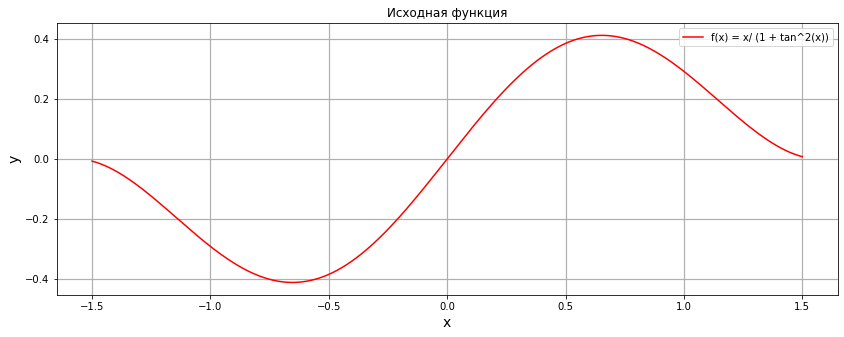

In [8]:
# график исходной функции

fig, ax = plt.subplots(figsize=(14, 5))

ax.plot(X_plot, Y_plot, color="red", label='f(x) = x/ (1 + tan^2(x))',)

ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("x", fontsize=14)        
ax.set_ylabel("y", fontsize=14)

plt.title("Исходная функция")
plt.legend()

plt.show()

#### Ошибки

In [9]:
def calculate_error(x, h, order, precision):
    if order == 1:
        return abs(f_first_deriative(x) - deriative(x, h, order, precision))
    elif order == 2:
        return abs(f_second_deriative(x) - deriative(x, h, order, precision))

In [10]:
def calculate_max_error(x_plot, h, order, precision):
    
    errors = []
    
    for x in x_plot:
        error = calculate_error(x, h, order, precision)
        errors.append(error)

    return max(errors)

In [11]:
# количество узлов сетки

node_min_count = 10
node_max_count = 1000

In [12]:
# вычисление ошибок

h_plot = []
fir_der_errors = {'precision_1': [], 'precision_2': []}
sec_der_errors = {'precision_2': [], 'precision_4': []}


for n in np.arange(node_min_count, node_max_count, step=10):
    
    x_plot, h = np.linspace(a, b, n, retstep=True)
    
    o1_pr1_error = calculate_max_error(x_plot, h, order=1, precision=1)
    o1_pr2_error = calculate_max_error(x_plot, h, order=1, precision=2)
    o2_pr2_error = calculate_max_error(x_plot, h, order=2, precision=2)
    o2_pr4_error = calculate_max_error(x_plot, h, order=2, precision=4)
    
    fir_der_errors['precision_1'].append(o1_pr1_error)
    fir_der_errors['precision_2'].append(o1_pr2_error)
    sec_der_errors['precision_2'].append(o2_pr2_error)
    sec_der_errors['precision_4'].append(o2_pr4_error)
    
    h_plot.append(h)

In [13]:
# вычисление коэффициентов ошибок

m = len(h_plot) - 1

ln_errors_1 = np.log(fir_der_errors['precision_1'])
ln_errors_2 = np.log(fir_der_errors['precision_2'])
ln_errors_3 = np.log(sec_der_errors['precision_2'])
ln_errors_4 = np.log(sec_der_errors['precision_4'])
       
k1 = (abs(ln_errors_1[m - 10]) - abs(ln_errors_1[10])) / (abs(np.log(h_plot)[m - 10]) - abs(np.log(h_plot)[10]))
k2 = (abs(ln_errors_2[m - 10]) - abs(ln_errors_2[10])) / (abs(np.log(h_plot)[m - 10]) - abs(np.log(h_plot)[10]))
k3 = (abs(ln_errors_3[m - 10]) - abs(ln_errors_3[10])) / (abs(np.log(h_plot)[m - 10]) - abs(np.log(h_plot)[10]))
k4 = (abs(ln_errors_4[m - 10]) - abs(ln_errors_4[10])) / (abs(np.log(h_plot)[m - 10]) - abs(np.log(h_plot)[10]))

In [14]:
d = {'H': h_plot, 
     'R_order_1_precision_1': fir_der_errors['precision_1'],  
     'R_order_1_precision_2': fir_der_errors['precision_2'], 
     'R_order_2_precision_2': sec_der_errors['precision_2'], 
     'R_order_2_precision_4': sec_der_errors['precision_4'], 
    }
df = pd.DataFrame(data=d)
df

,H,R_order_1_precision_1,R_order_1_precision_2,R_order_2_precision_2,R_order_2_precision_4
0,0.333333,0.374297,0.276722,0.571768,1.209584e-02
1,0.157895,0.182639,0.062657,0.044467,6.710392e-04
2,0.103448,0.126514,0.026285,0.045160,1.245584e-04
3,0.076923,0.096512,0.014302,0.032048,3.807279e-05
4,0.061224,0.077951,0.008960,0.022948,1.533214e-05
...,...,...,...,...,...
94,0.003161,0.004237,0.000023,0.000087,1.407428e-10
95,0.003128,0.004193,0.000022,0.000085,1.276650e-10
96,0.003096,0.004150,0.000022,0.000083,1.283511e-10
97,0.003064,0.004107,0.000021,0.000082,1.311198e-10


#### Графики ошибок

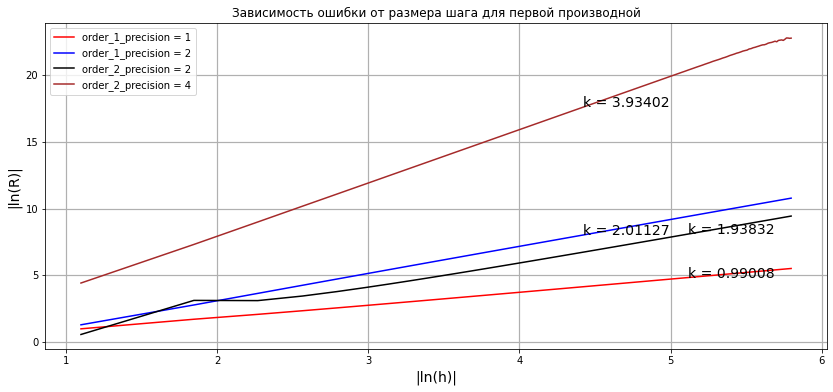

In [16]:
# график зависимости ошибки от размера шага для первой производной

fig, ax = plt.subplots(figsize=(14, 6))

# ax.plot(np.log(h_plot), np.log(fir_der_errors['precision_1']), color="red", label='precision = 1',)
# ax.plot(np.log(h_plot), np.log(fir_der_errors['precision_2']), color="blue", label='precision = 2',)

ax.plot(abs(np.log(h_plot)), abs(ln_errors_1), color="red", label='order_1_precision = 1',)
plt.text(abs(np.log(h_plot[round(m / 2)])), abs(ln_errors_1[round(m / 2)]), "k = {0:.5f}".format(k1), fontsize = 14)

ax.plot(abs(np.log(h_plot)), abs(ln_errors_2), color="blue", label='order_1_precision = 2',)
plt.text(abs(np.log(h_plot[round(m / 4)])), abs(ln_errors_2[round(m / 4)]), "k = {0:.5f}".format(k2), fontsize = 14)



ax.plot(abs(np.log(h_plot)), abs(ln_errors_3), color="black", label='order_2_precision = 2',)
plt.text(abs(np.log(h_plot[round(m / 2)])), abs(ln_errors_3[round(m / 2)]), "k = {0:.5f}".format(k3), fontsize = 14)

ax.plot(abs(np.log(h_plot)), abs(ln_errors_4), color="brown", label='order_2_precision = 4',)
plt.text(abs(np.log(h_plot[round(m / 4)])), abs(ln_errors_4[round(m / 4)]), "k = {0:.5f}".format(k4), fontsize = 14)



ax.grid(which="major", linewidth=1.2)
ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

ax.set_xlabel("|ln(h)|", fontsize=14)        
ax.set_ylabel("|ln(R)|", fontsize=14)

plt.title("Зависимость ошибки от размера шага для первой производной")
plt.legend()

plt.show()

In [16]:
# # график зависимости ошибки от размера шага для второй производной

# fig, ax = plt.subplots(figsize=(14, 6))

# # ax.plot(np.log(h_plot), np.log(sec_der_errors['precision_2']), color="red", label='precision = 2',)
# # ax.plot(np.log(h_plot), np.log(sec_der_errors['precision_4']), color="blue", label='precision = 4',)

# ax.plot(abs(np.log(h_plot)), abs(ln_errors_3), color="black", label='precision = 2',)
# plt.text(abs(np.log(h_plot[round(m / 2)])), abs(ln_errors_3[round(m / 2)]), "k = {0:.5f}".format(k3), fontsize = 14)

# ax.plot(abs(np.log(h_plot)), abs(ln_errors_4), color="brown", label='precision = 4',)
# plt.text(abs(np.log(h_plot[round(m / 4)])), abs(ln_errors_4[round(m / 4)]), "k = {0:.5f}".format(k4), fontsize = 14)


# ax.grid(which="major", linewidth=1.2)
# ax.grid(which="minor", linestyle="--", color="gray", linewidth=0.5)

# ax.set_xlabel("|ln(h)|", fontsize=14)        
# ax.set_ylabel("|ln(R)|", fontsize=14)

# plt.title("Зависимость ошибки от размера шага для второй производной")
# plt.legend()

# plt.show()